In [146]:
import json
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [147]:
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.dynamics import GenerativeDynamics
from graph_dynamics.utils import graph_paths_visualization
from graph_dynamics.dynamics import GraphsFormatsHandlers
from graph_dynamics.networks.datatypes import VanillaGraph
from graph_dynamics.networks.communities import CommunityGraph

from graph_dynamics.dynamics import MacrostatesHandlers
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.utils import gd_files_handler
from graph_dynamics.embeddings import alignment
from graph_dynamics.dynamics import GenerativeDynamicsCommunities
from graph_dynamics.networks import communities

In [148]:
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes

In [149]:
Macrostates.macrostate_function_dictionary.keys()

['degree_distribution',
 'basic_stats',
 'pagerank',
 'new_nodes',
 'bigclam',
 'node2vec_macrostates']

In [150]:
number_of_steps = 100
number_of_steps_in_memory = 1

forest_fire_communities_parameters = {0:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},                                                                                                                                                                                                                                                                                                                                                 
                                      1:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},
                                      2:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},
                                      3:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.22,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.}}

numberOfCommunitiesAndNoise = len(forest_fire_communities_parameters.keys())

#back ground evolution
timeSeriesCommunity0 = np.ones(number_of_steps)*0
timeSeriesCommunity0[0] = 0

timeSeriesCommunity1 = np.ones(number_of_steps)*5
timeSeriesCommunity1[0] = 30

timeSeriesCommunity2 = np.ones(number_of_steps)*1
timeSeriesCommunity2[0] = 30

timeSeriesCommunity3 = np.ones(number_of_steps)*1
timeSeriesCommunity3[0] = 30

timeSeriesOfCommunities = {0:timeSeriesCommunity0,
                           1:timeSeriesCommunity1,
                           2:timeSeriesCommunity2,
                           3:timeSeriesCommunity3}

#the initial size of the community is that as defined by the time series
numberOfNodesPerCommunities = [timeSeriesOfCommunities[c][0] for c in range(1,numberOfCommunitiesAndNoise)]
numberOfBridgesPerCommunity = [2,2,2]
barabasiParameter = 3
initial_graph, subGraphs,Q,bridgesInCommunity = communities.barabasiAlbertCommunities(numberOfNodesPerCommunities, 
                                                                                      numberOfBridgesPerCommunity, 
                                                                                      barabasiParameter)
initial_communities = {c:subGraphs[c-1].nodes() for c in range(1,numberOfCommunitiesAndNoise)}
initial_communities[0]=[]


simulations_directory = "/home/cesar/Desktop/Doctorado/Projects/Networks/Dynamics/Simulations/"

DYNAMICS_PARAMETERS = {"number_of_steps":number_of_steps,
                        "number_of_steps_in_memory":number_of_steps_in_memory,
                        "simulations_directory":simulations_directory,
                        "dynamics_identifier":"CommunityForestFire4",
                        "graph_class":"CommunityGraph",
                        "verbose":True,
                        "datetime_timeseries":False,
                        "initial_date":1}

DYNAMICS_PARAMETERS["macrostates"] =  [("basic_stats",())]
gd_directory = "/home/cesar/Desktop/Doctorado/Projects/Networks/Dynamics/Simulations/CommunityForestFire4_gd/"

community_graph = CommunityGraph(identifier_string="Communities",
                                 initial_comunities=initial_communities,
                                 networkx_graph=initial_graph)

dynamics_object = GenerativeDynamicsCommunities.CommunitiesForestFire(community_graph,
                                                                      initial_communities,
                                                                      forest_fire_communities_parameters,
                                                                      timeSeriesOfCommunities,
                                                                      DYNAMICS_PARAMETERS)

New Dynamics Directory


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# Dynamics

In [151]:
dynamics_object.evolve(100,community_graph)

#100 STEPS EVOLUTION STARTED FOR CommunityForestFire4
#STARTING EVOLUTION AT STEP 0
Number of initial nodes:  90
All graph in memory
90
last guy
90
1
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
97
last guy
97
2
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  3

All graph in memory
216
last guy
216
19
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
223
last guy
223
20
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
314
last guy
314
33
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
321
last guy
321
34
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
412
last guy
412
47
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
419
last guy
419
48
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
503
last guy
503
60
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
510
last guy
510
61
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
594
last guy
594
73
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
601
last guy
601
74
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
685
last guy
685
86
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
692
last guy
692
87
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
776
last guy
776
99
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
783
last guy
783


In [152]:
ALL_TIME_INDEXES,DYNAMICS_PARAMETERS,macroNumbers = gd_files_handler.gd_folder_stats(gd_directory,True)

Dynamics CommunityForestFire4
{u'DynamicsClassParameters': {u'CommunitiesForestFire': {u'0': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                                                u'OrphanPrb': 0.0,
                                                                u'StartNNodes': 1,
                                                                u'Take2AmbasPrb': 0.0},
                                                         u'1': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                            

In [153]:
#EVALUATE NEW NODES
window = 1
rolling = True
Macrostates.evaluate_vanilla_macrostates_window(gd_directory,
                                                [("new_nodes",())], 
                                                "newnodes", 
                                                window, 
                                                rolling)

Evaluating Time 1 for newnodes
Evaluating Time 2 for newnodes
Evaluating Time 3 for newnodes
Evaluating Time 4 for newnodes
Evaluating Time 5 for newnodes
Evaluating Time 6 for newnodes
Evaluating Time 7 for newnodes
Evaluating Time 8 for newnodes
Evaluating Time 9 for newnodes
Evaluating Time 10 for newnodes
Evaluating Time 11 for newnodes
Evaluating Time 12 for newnodes
Evaluating Time 13 for newnodes
Evaluating Time 14 for newnodes
Evaluating Time 15 for newnodes
Evaluating Time 16 for newnodes
Evaluating Time 17 for newnodes
Evaluating Time 18 for newnodes
Evaluating Time 19 for newnodes
Evaluating Time 20 for newnodes
Evaluating Time 21 for newnodes
Evaluating Time 22 for newnodes
Evaluating Time 23 for newnodes
Evaluating Time 24 for newnodes
Evaluating Time 25 for newnodes
Evaluating Time 26 for newnodes
Evaluating Time 27 for newnodes
Evaluating Time 28 for newnodes
Evaluating Time 29 for newnodes
Evaluating Time 30 for newnodes
Evaluating Time 31 for newnodes
Evaluating Time 3

In [154]:
#EVALUATE NODE2VEC
nargs = {"dimensions":2,
         "directed":False,
         "p":0.001,
         "q":2,
         "num_walks":10,
         "walk_length":80,
         "window_size":10,
         "workers":8,
         "iter":1,
         "weighted":False,
         "undirected":True}


macrostates_run_ideintifier = "node2vec" 
macrostates_names  = [("pagerank",()),("node2vec_macrostates",(nargs,))]

Macrostates.evaluate_vanilla_macrostates(gd_directory, 
                                         macrostates_names, 
                                         macrostates_run_ideintifier)

Evaluating Time 0 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 1 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 2 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 3 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 4 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 5 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 6 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 7 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 8 for node2vec
Walk iteration:
1 / 10
2 

10 / 10
Evaluating Time 69 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 70 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 71 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 72 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 73 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 74 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 75 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 76 for node2vec
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 77 for node2vec
Walk ite

# Initial and New Nodes Ordering

In [158]:
macro_state_identifier = 'node2vec_macrostates'
macrostate_file_indentifier = 'node2vec'

time_index = 0
initial_embeddings = MacrostatesHandlers.time_index_macro(gd_directory,
                                                          macro_state_identifier,
                                                          macrostate_file_indentifier,
                                                          time_index)
initial_nodes = initial_embeddings.keys()
initial_nodes.sort()

In [159]:
new_nodes_per_time = alignment.all_new_nodes_per_time(gd_directory,initial_nodes,latest_index=99)

In [160]:
len(new_nodes_per_time)

99

# ALIGNMENT 

In [161]:
dynamics_identifier = DYNAMICS_PARAMETERS["dynamics_identifier"]

In [162]:
base_index = 99
current_index = 2
current_index = base_index
macro_file_identifier = "node2vec"
new_macrofile_indentifier = "aligned-node2vec"
macro_state_identifier = 'node2vec_macrostates'
node_embeddings_base = MacrostatesHandlers.time_index_macro(gd_directory,
                                                            macro_state_identifier,
                                                            "node2vec",
                                                            base_index)
# AGGREGATE ALL NODES AT THIS SPECIFIC TIME
nodes_base = []
for i in range(0,base_index):
    nodes_base.extend(new_nodes_per_time[i])

w_base = []
for node in nodes_base:
    w_base.append(np.array(node_embeddings_base[node]))
w_base = np.array(w_base)

# FILES    
macrostate_filename = gd_directory+dynamics_identifier+"_mGD_"+new_macrofile_indentifier+"_"+str(current_index)+"_.gd"
with open(macrostate_filename,"w") as outfile:
    macrostate_json = {"node2vec_macrostates":node_embeddings_base}
    json.dump(macrostate_json, outfile)

In [163]:
for index in range(99,0,-1):
    other_index = index - 1
    # AGGREGATE ALL NODES AT THIS SPECIFIC TIME
    nodes_other = []
    for i in range(0,other_index+1):
        nodes_other.extend(new_nodes_per_time[i])
    # OBTAINS THE EMBEDDINGS
    node_embeddings_other = MacrostatesHandlers.time_index_macro(gd_directory,
                                                                 macro_state_identifier,
                                                                 "node2vec",
                                                                 other_index)
    w_other = []
    for node in nodes_other:
        w_other.append(np.array(node_embeddings_other[node]))
    w_other = np.array(w_other)
    # ALIGNMENT
    base_embed, w_other = alignment.procrustes_align(w_base,w_other)
    # OUTPUT
    node_embeddings_other = {}
    for i,node in enumerate(nodes_other):
        node_embeddings_other[node] = w_other[i].tolist()
        
    macrostate_filename = gd_directory+dynamics_identifier+"_mGD_"+new_macrofile_indentifier+"_"+str(other_index)+"_.gd"
    with open(macrostate_filename,"w") as outfile:
        macrostate_json = {"node2vec_macrostates":node_embeddings_other}
        json.dump(macrostate_json, outfile)
    
    #COPY 
    nodes_base = copy.copy(nodes_other)
    node_embeddings_other = copy.copy(node_embeddings_base)
    w_base = copy.copy(w_other)

# READ ALL ALIGNEMENTS

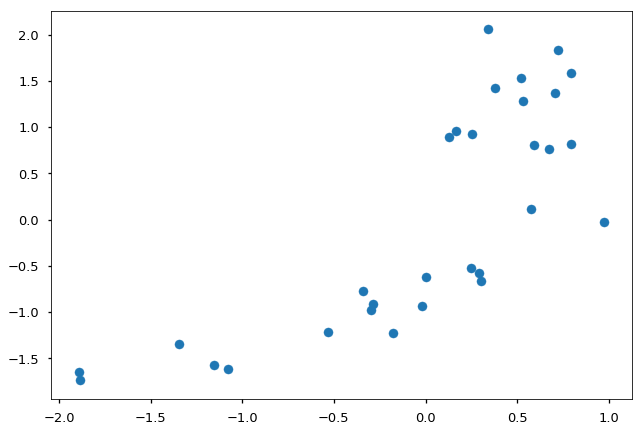

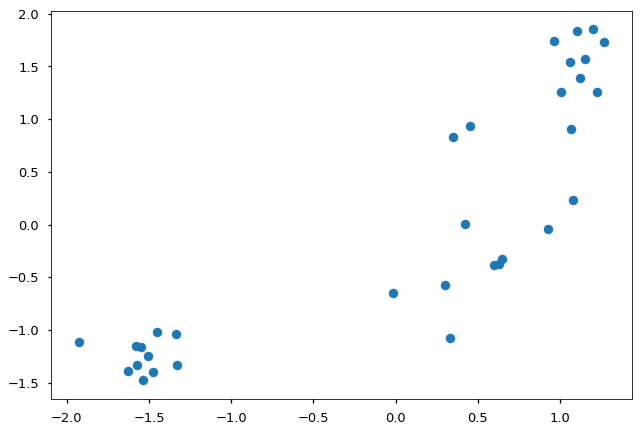

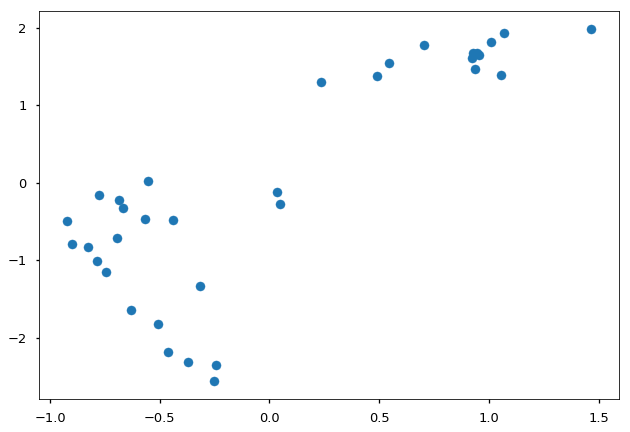

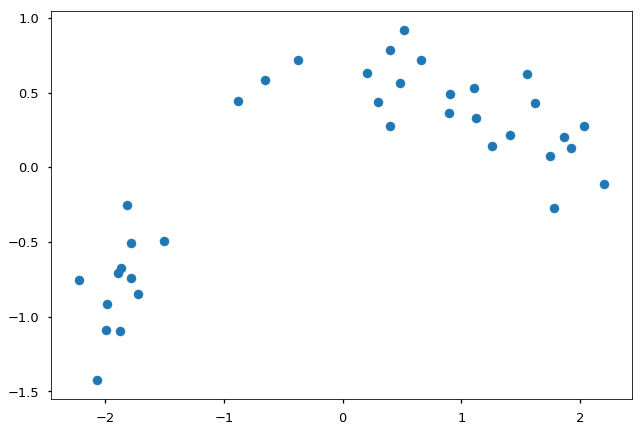

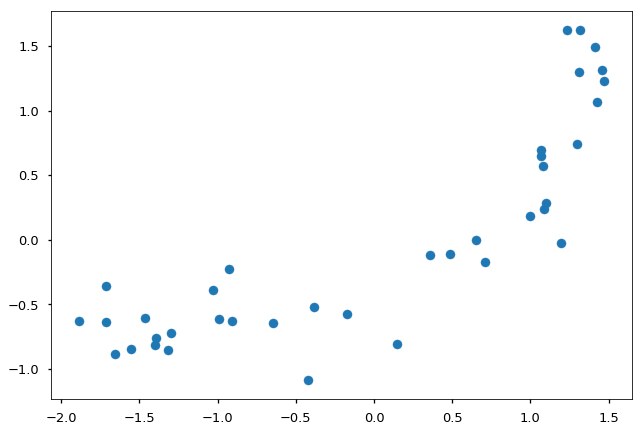

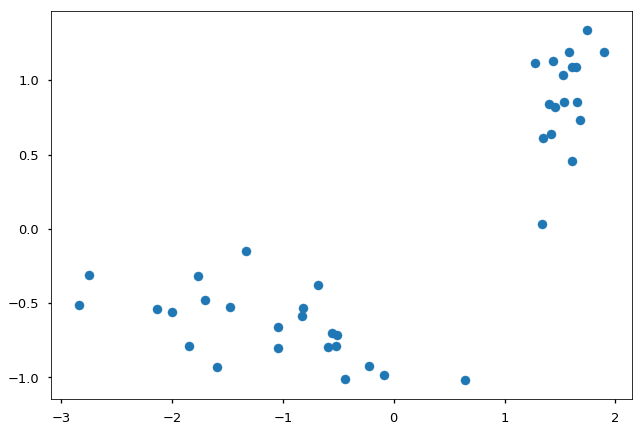

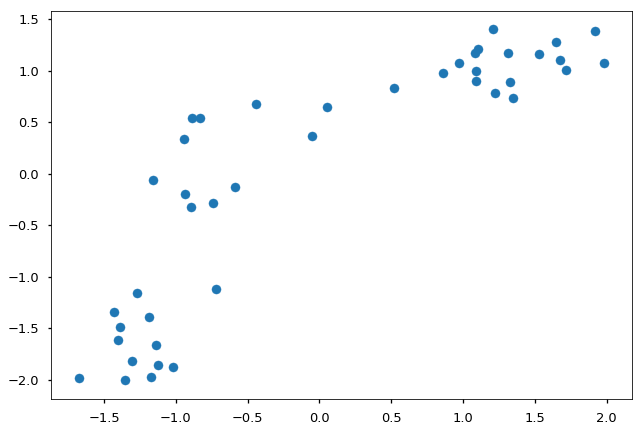

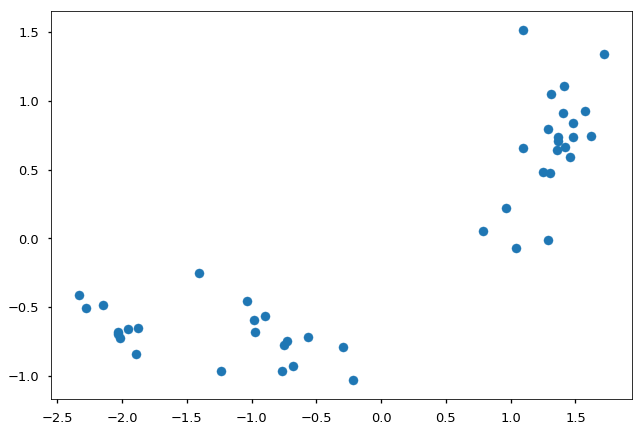

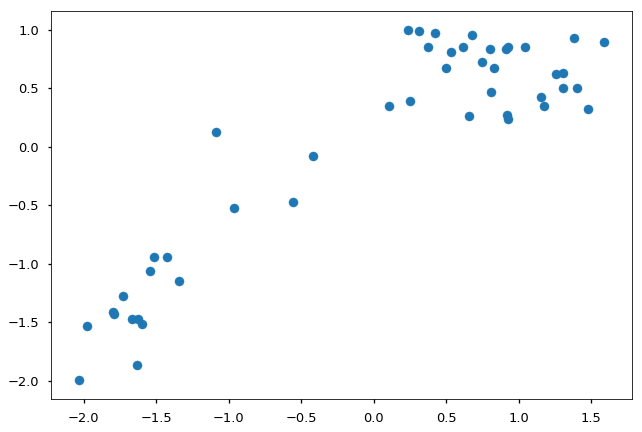

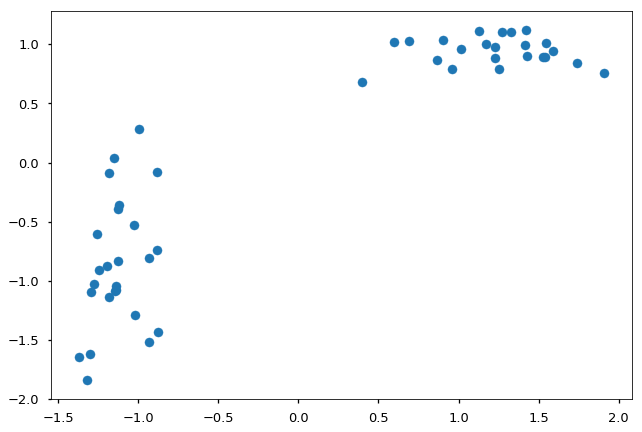

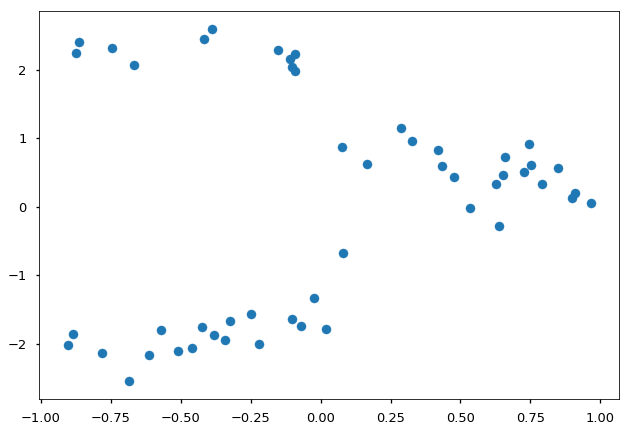

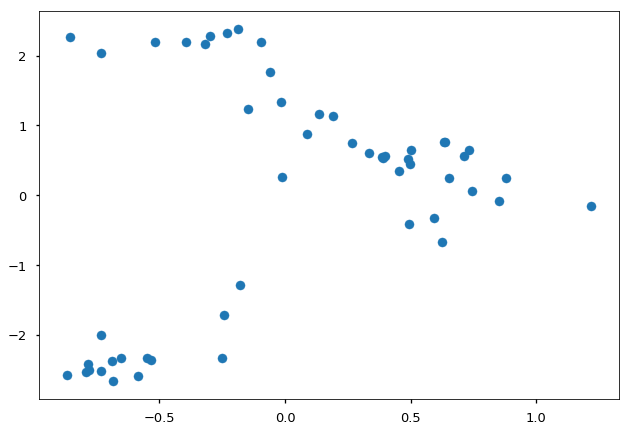

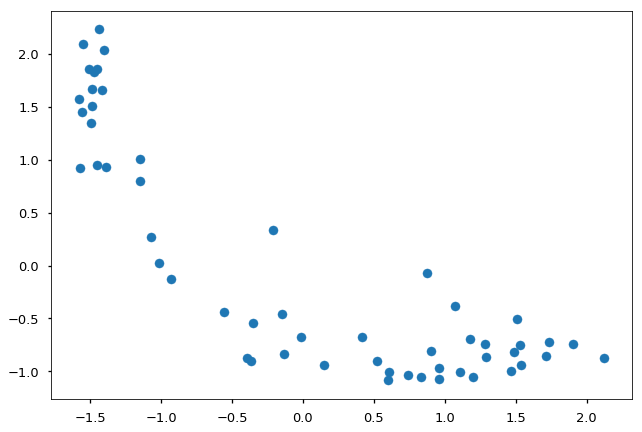

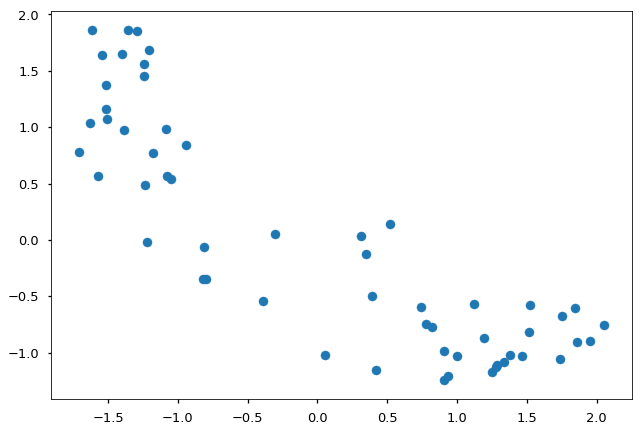

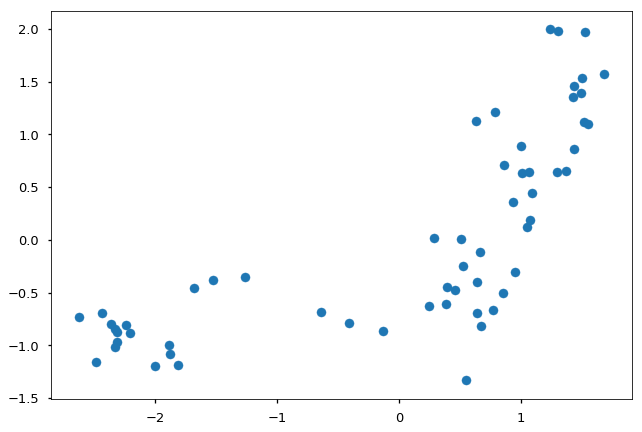

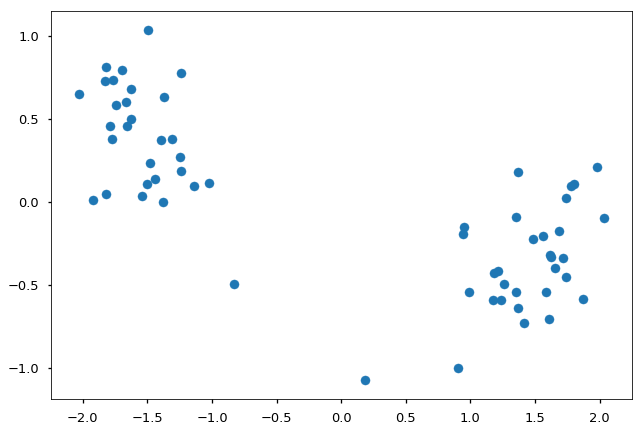

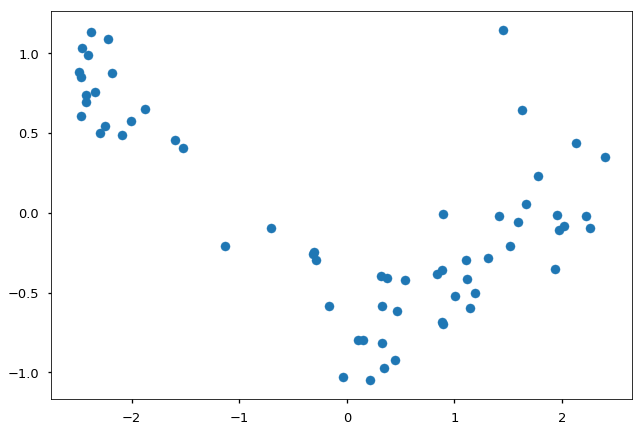

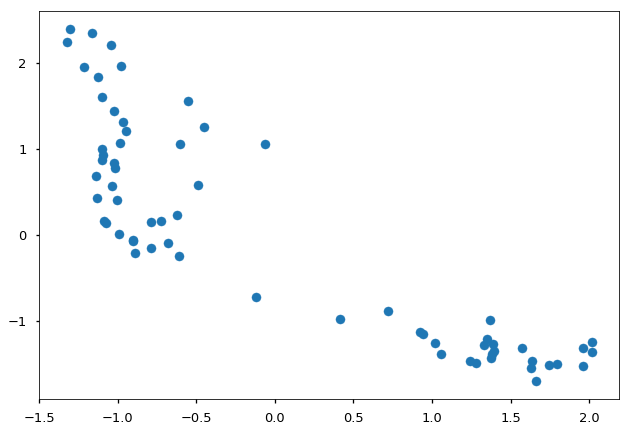

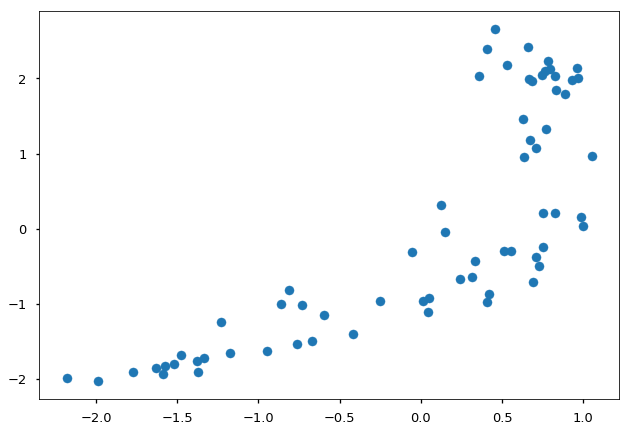

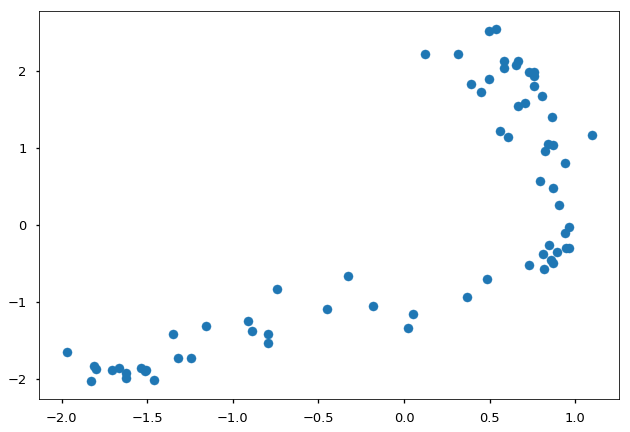

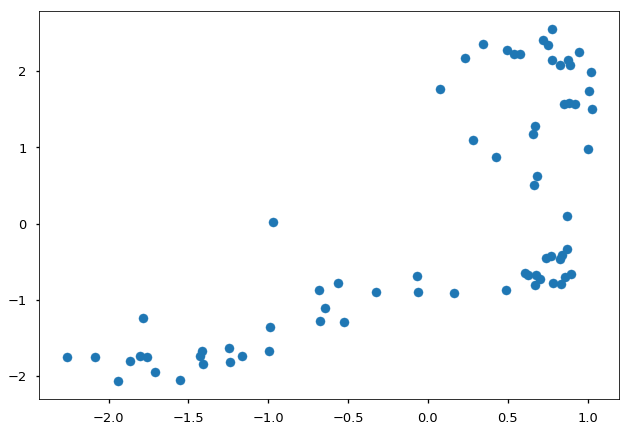

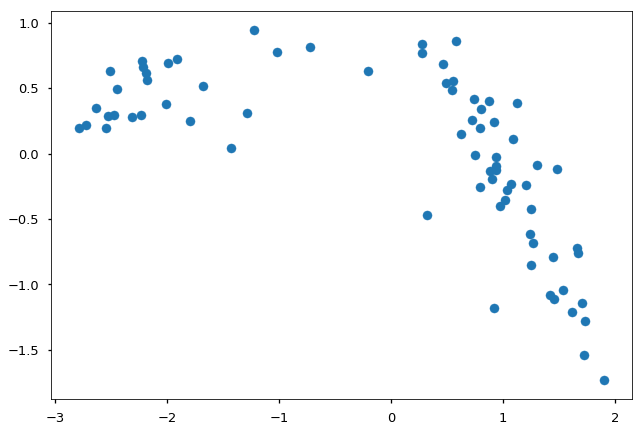

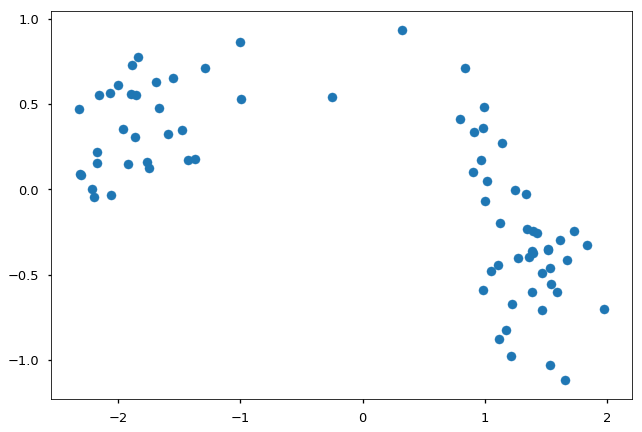

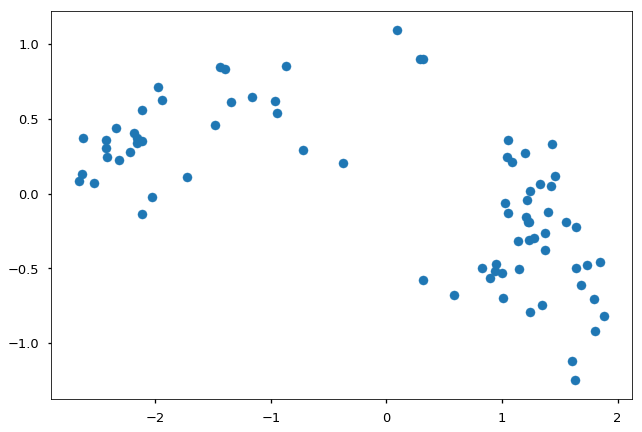

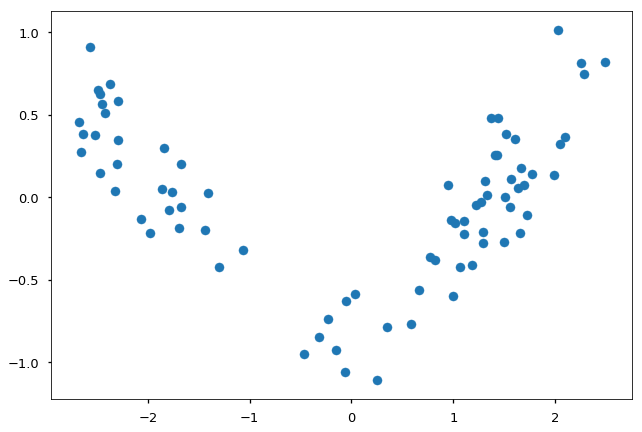

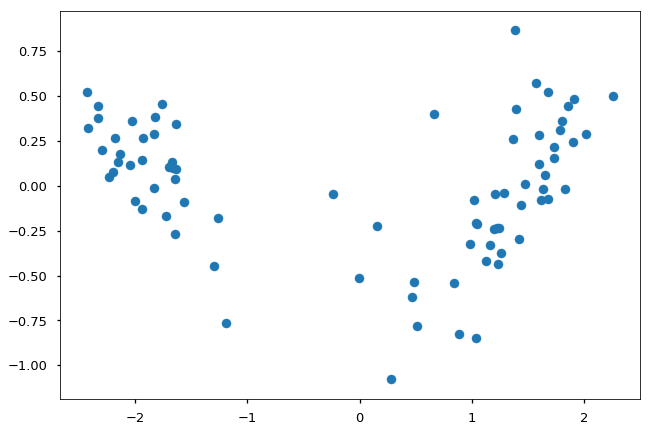

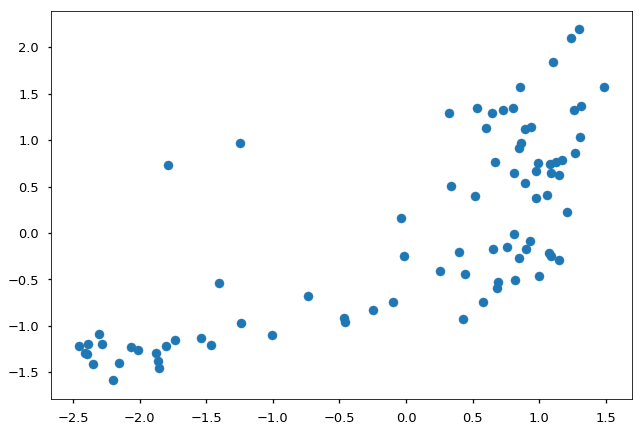

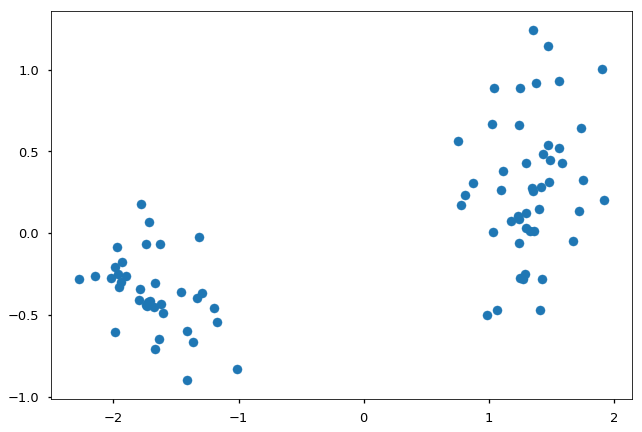

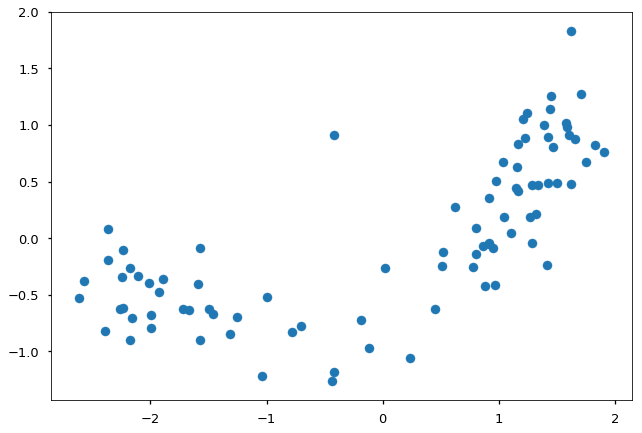

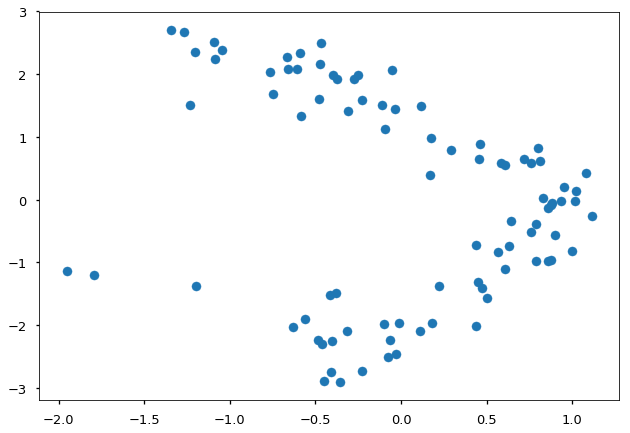

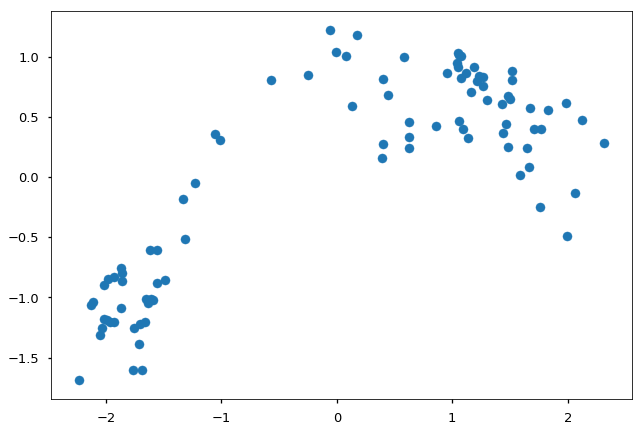

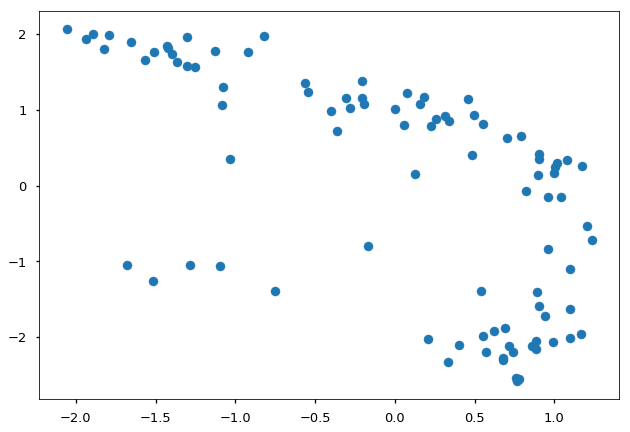

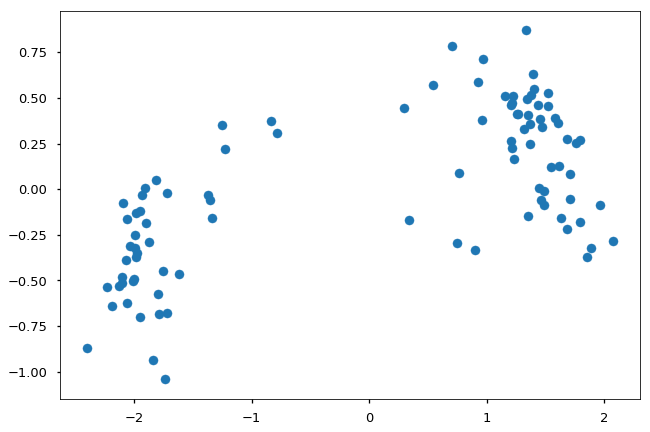

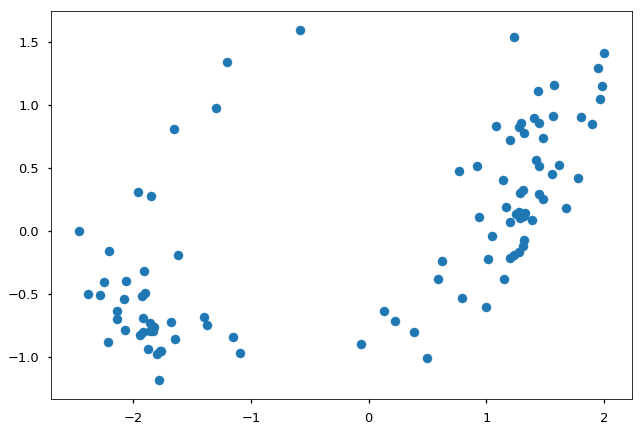

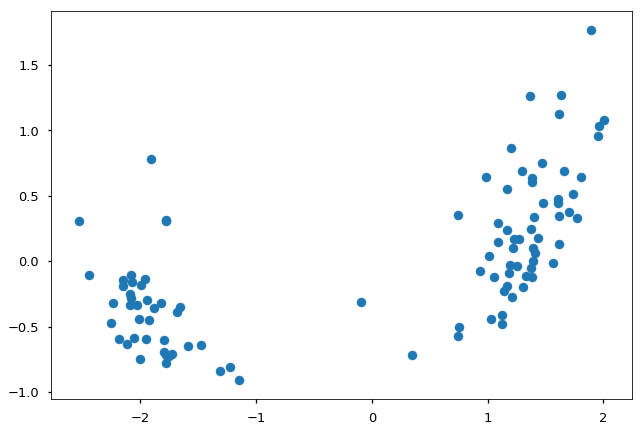

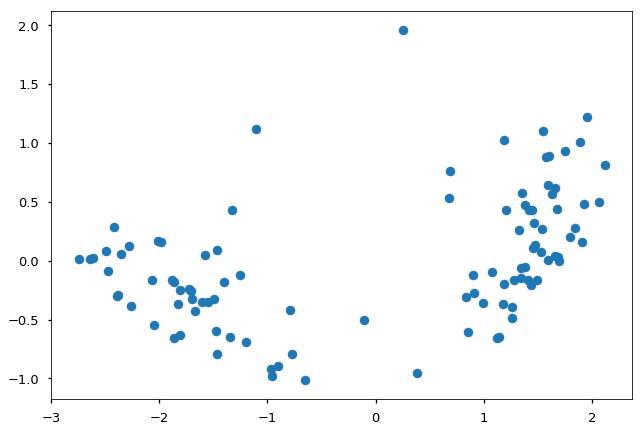

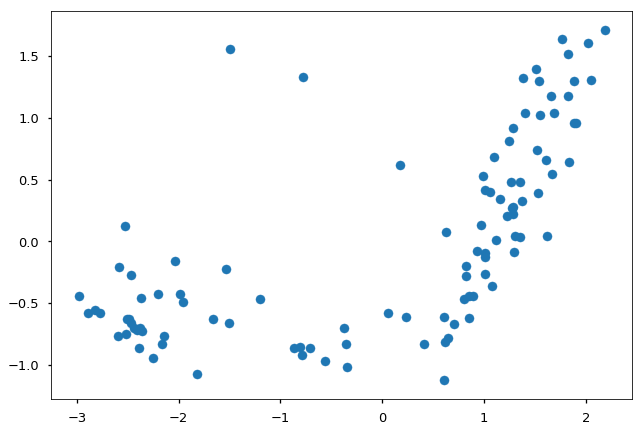

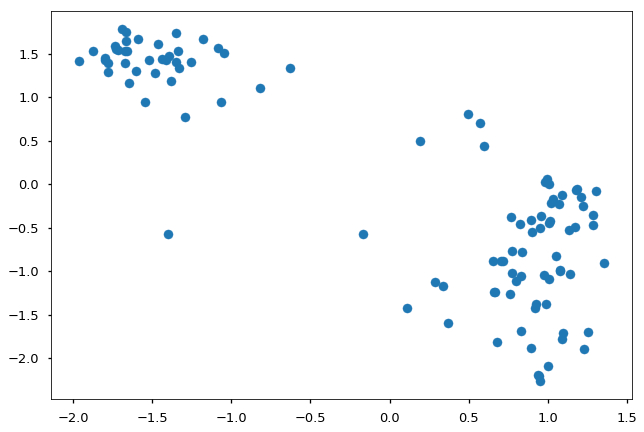

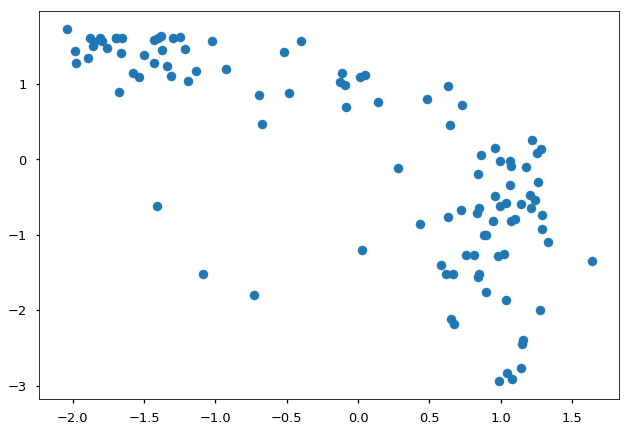

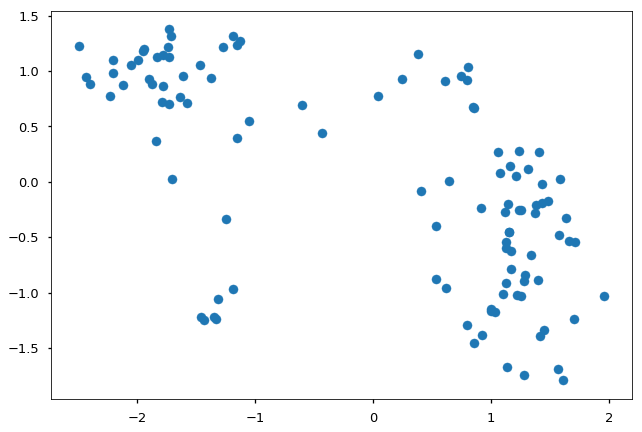

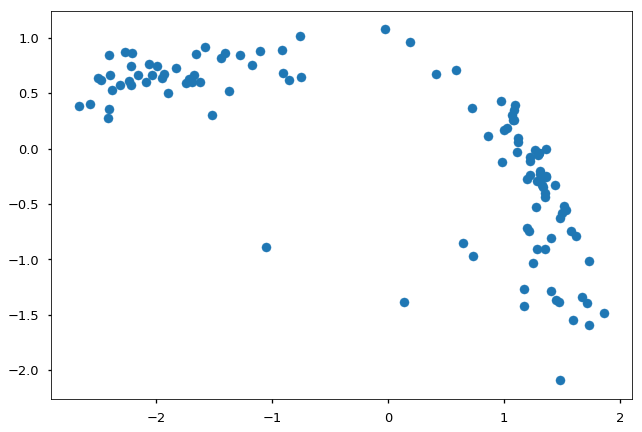

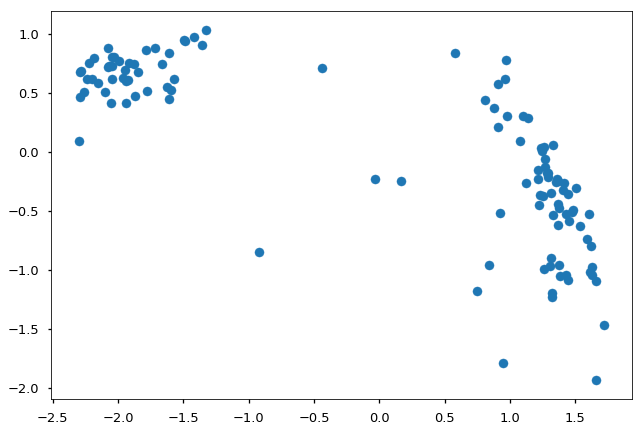

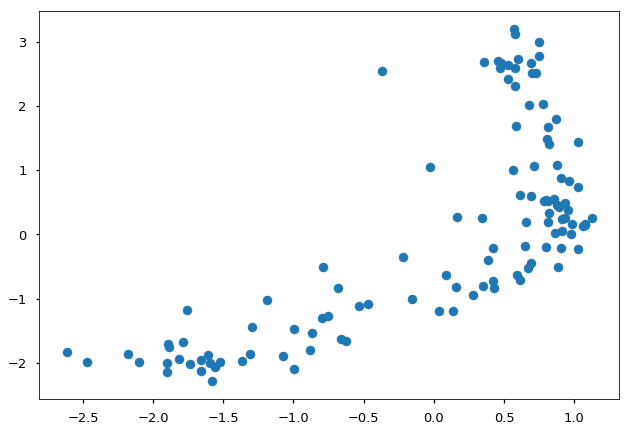

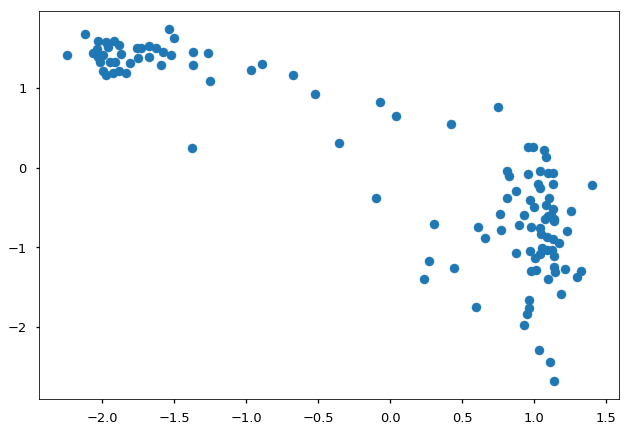

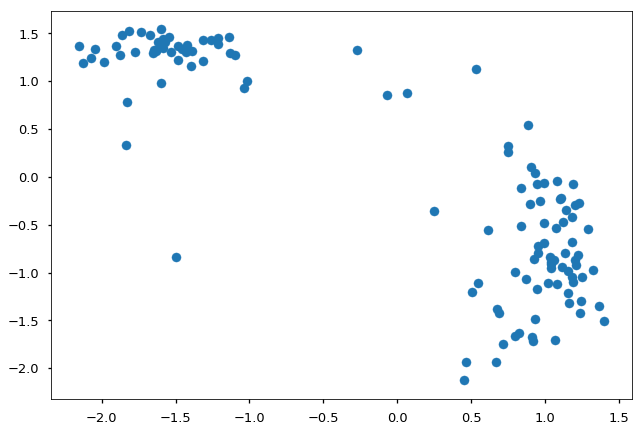

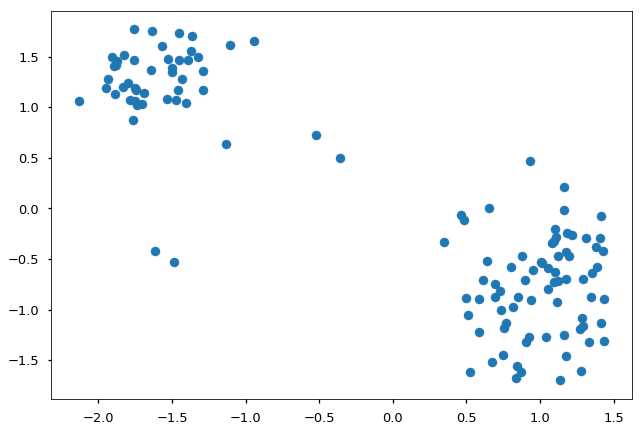

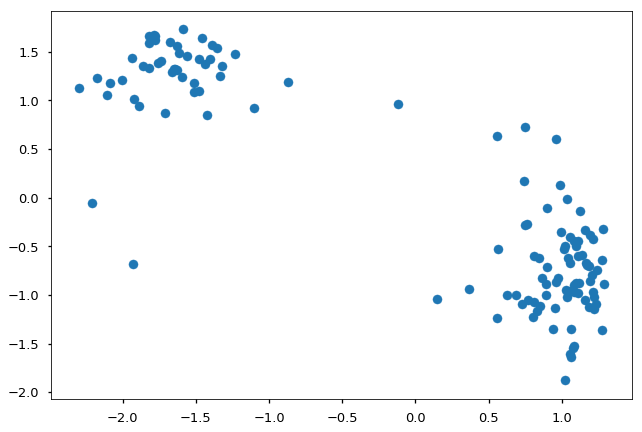

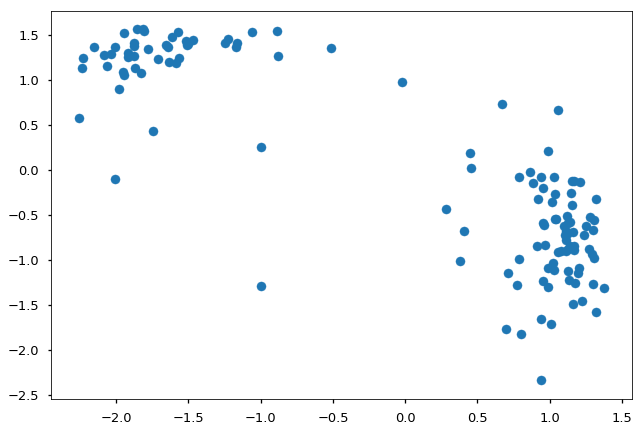

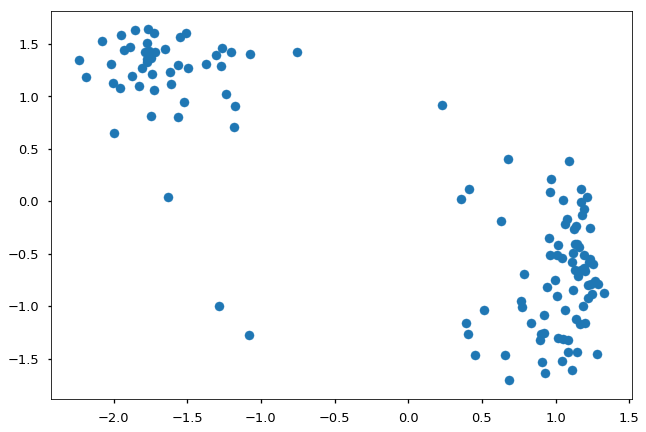

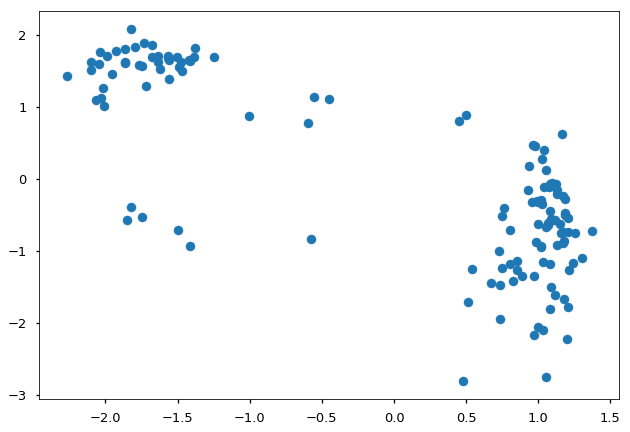

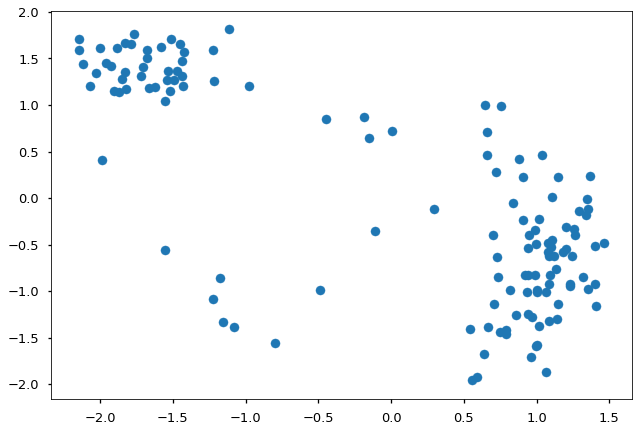

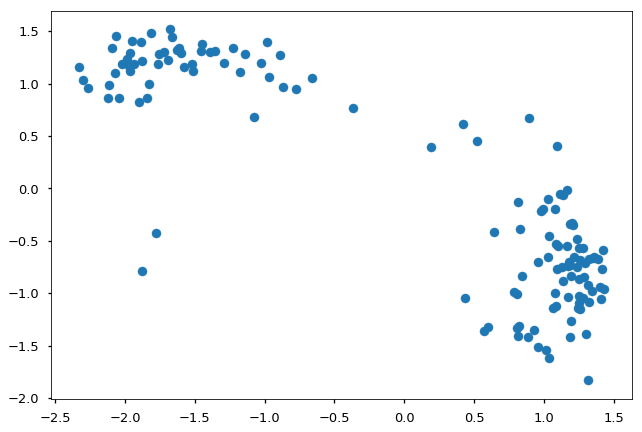

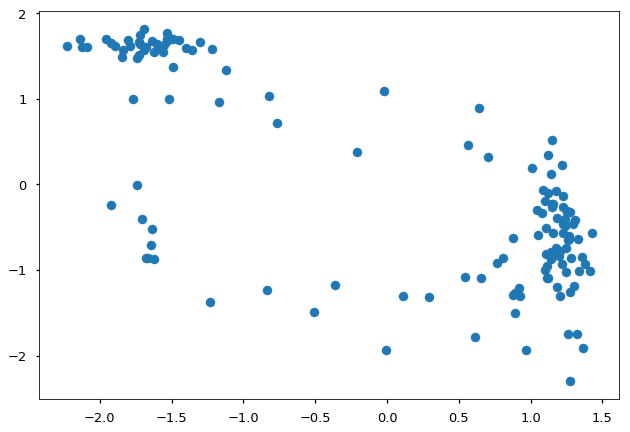

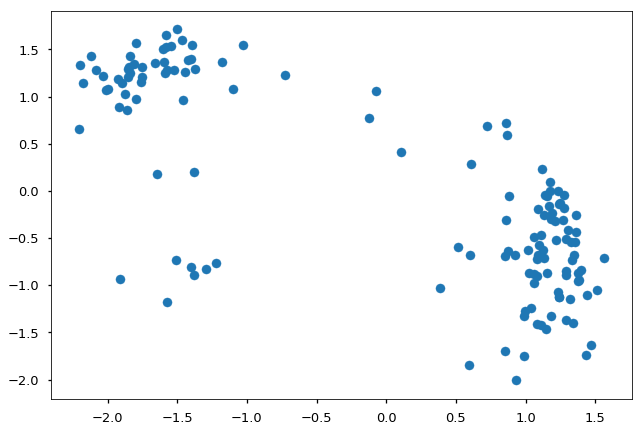

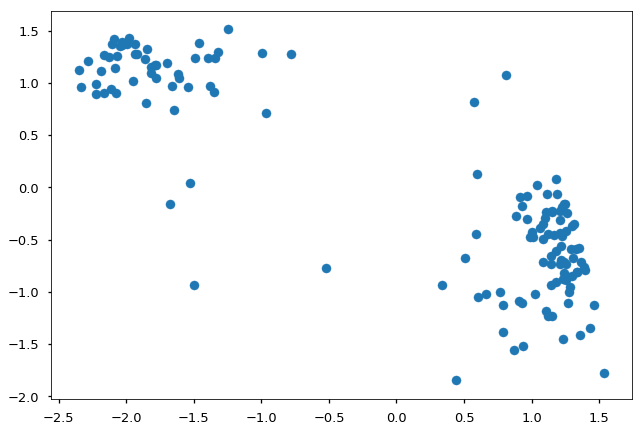

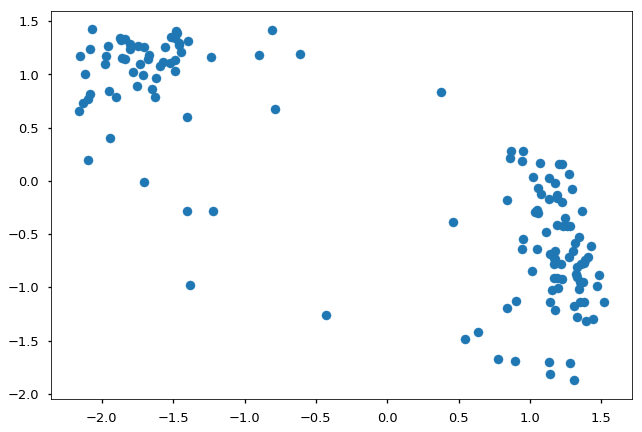

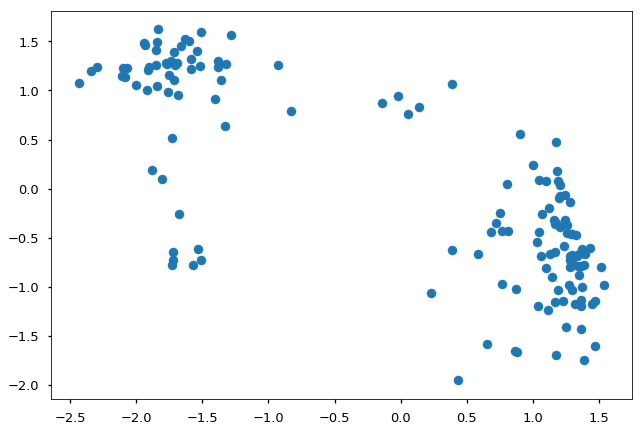

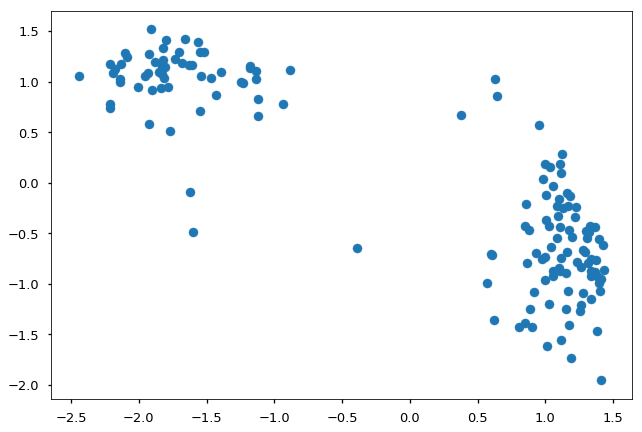

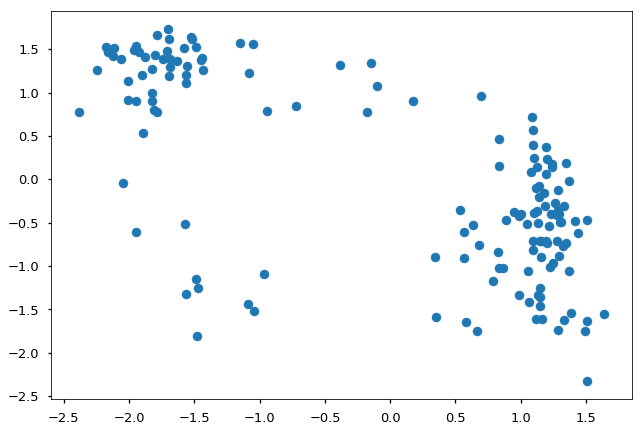

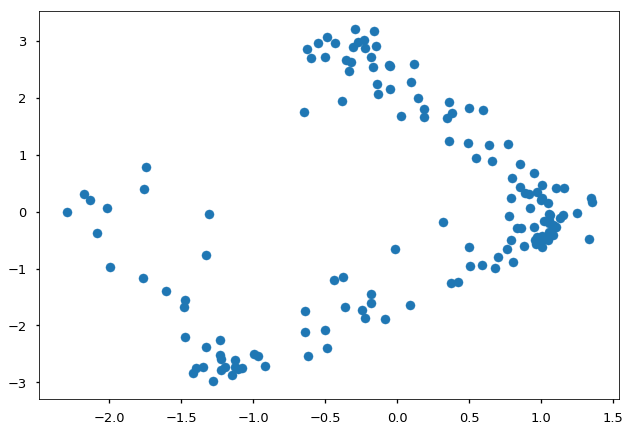

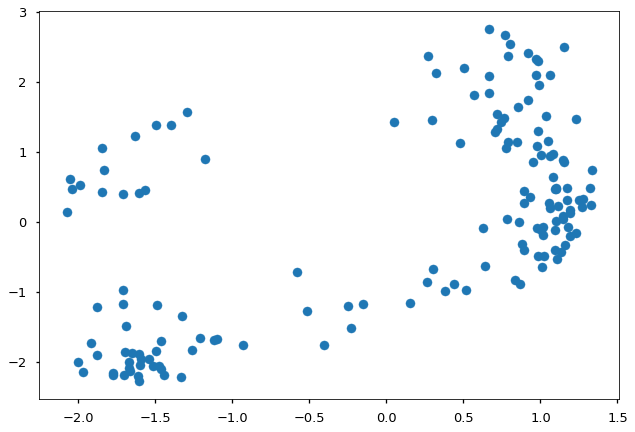

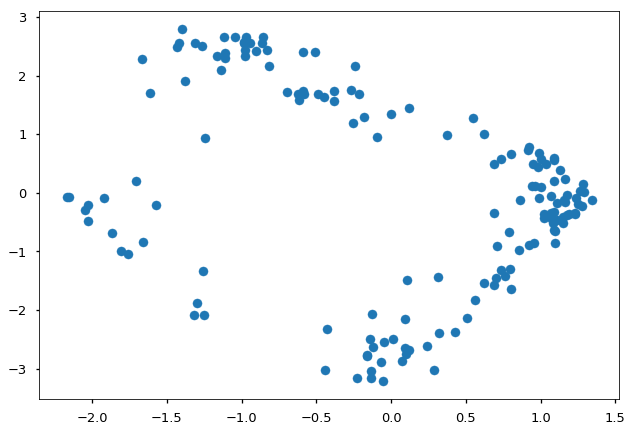

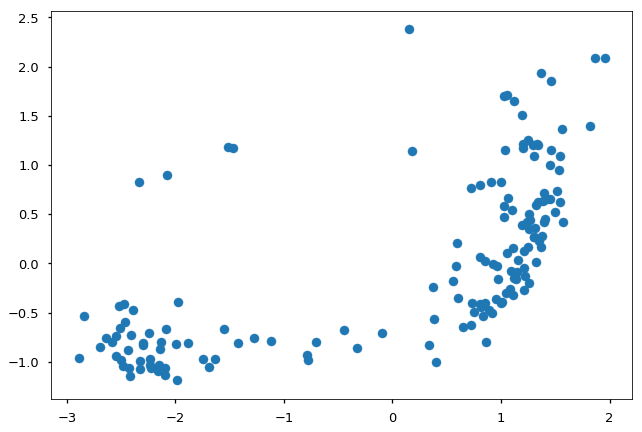

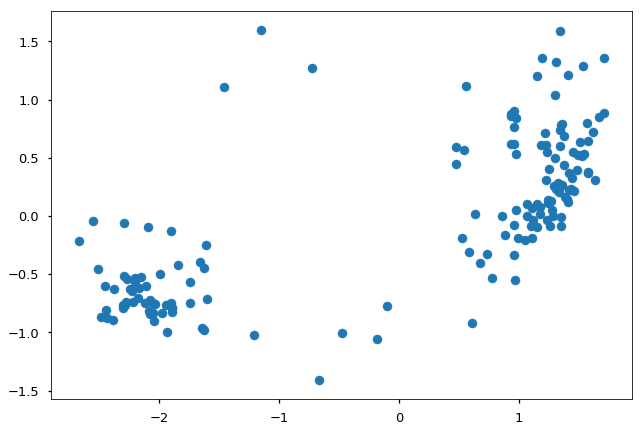

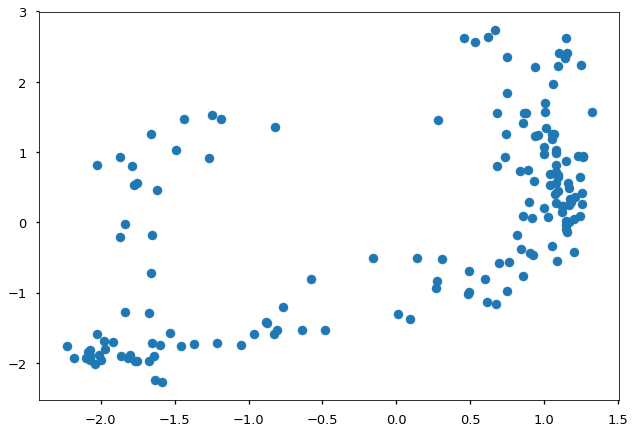

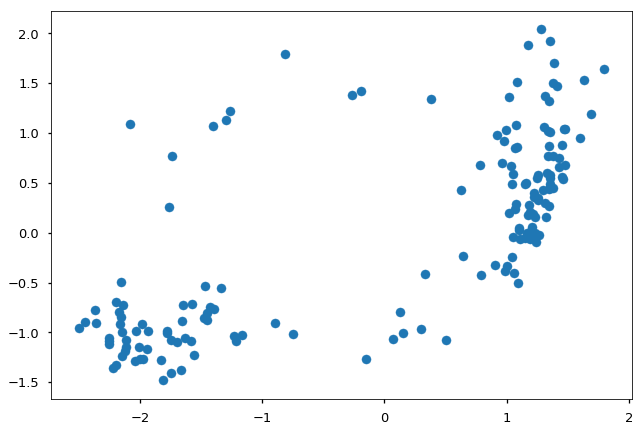

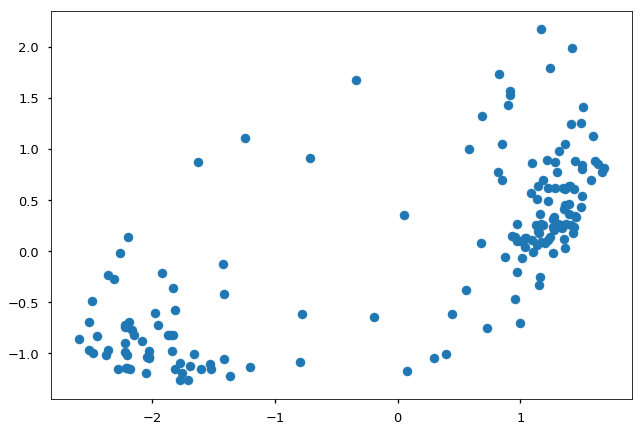

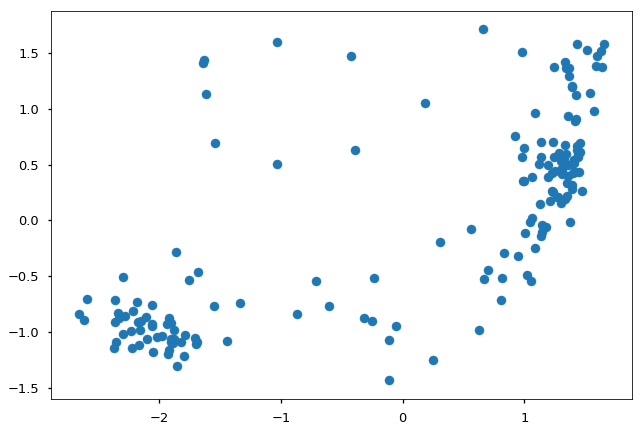

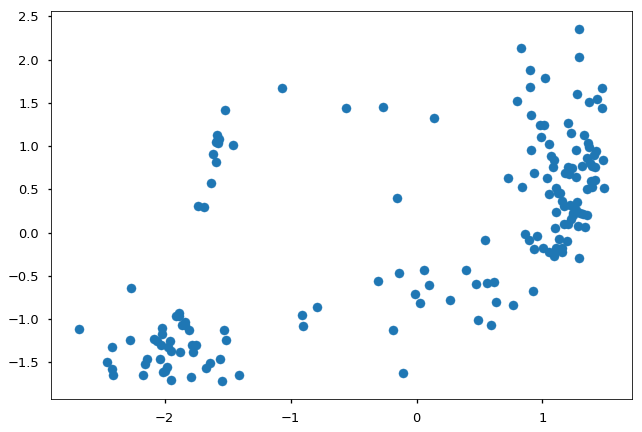

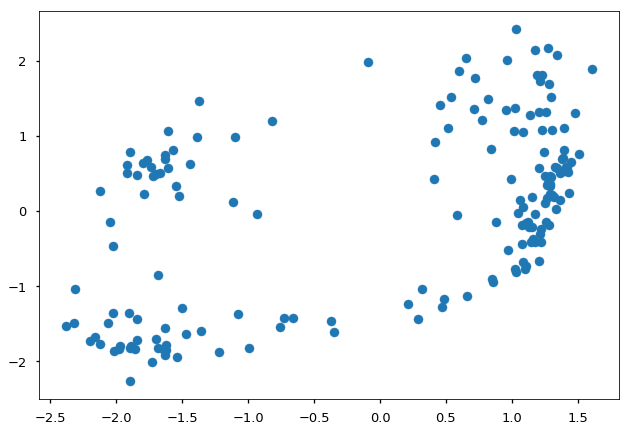

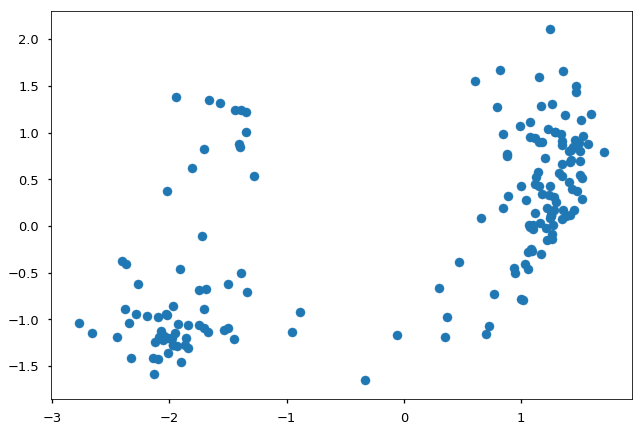

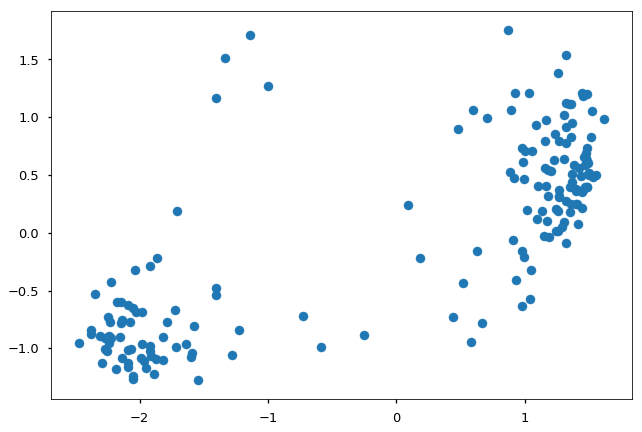

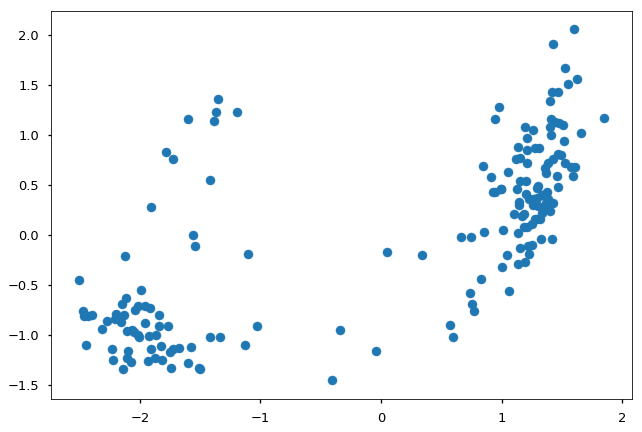

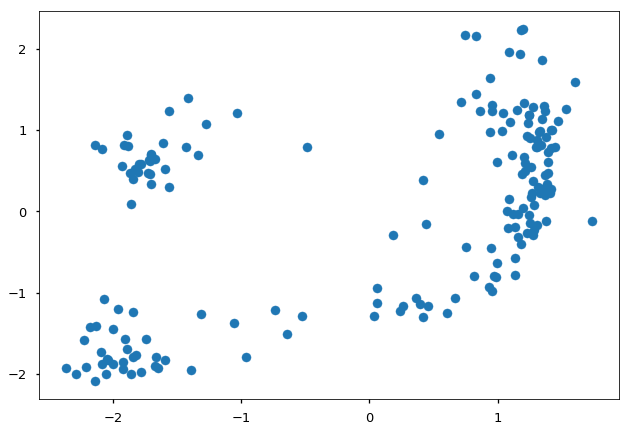

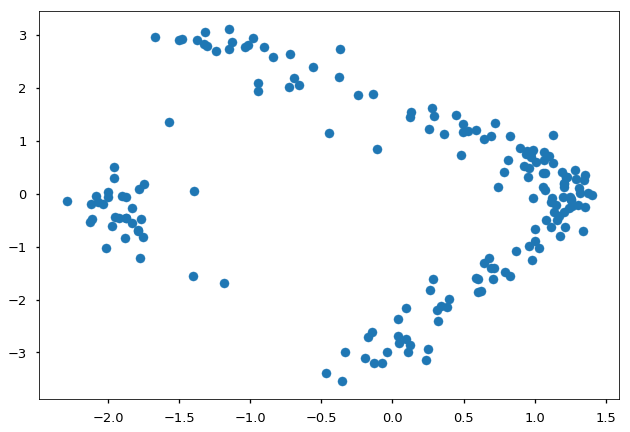

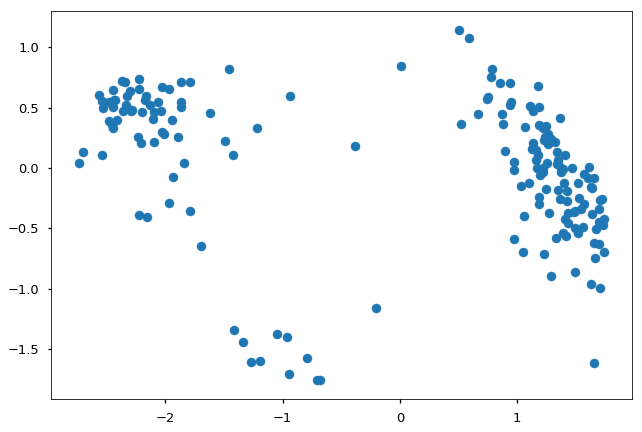

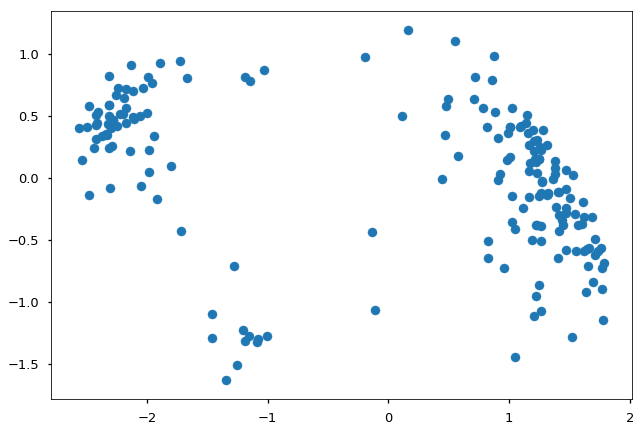

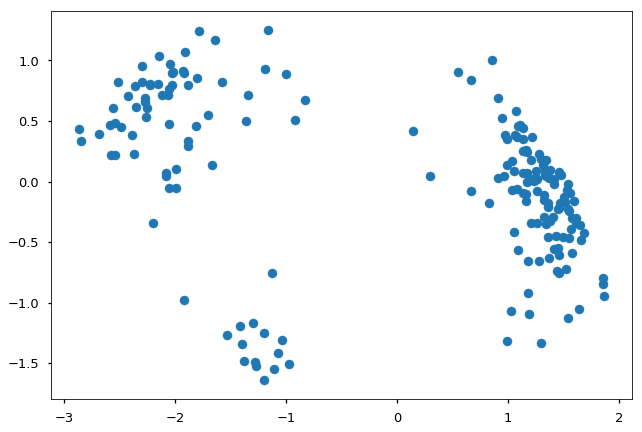

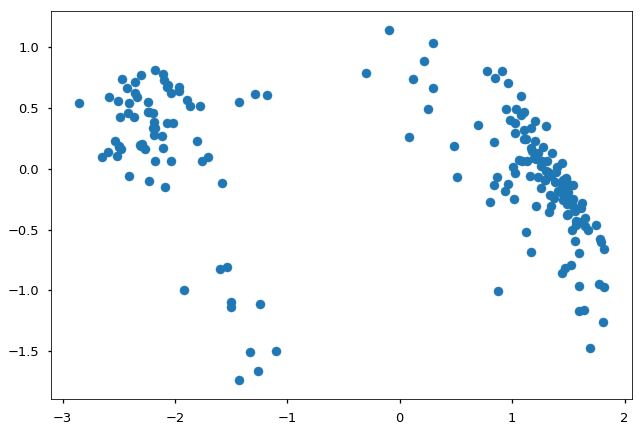

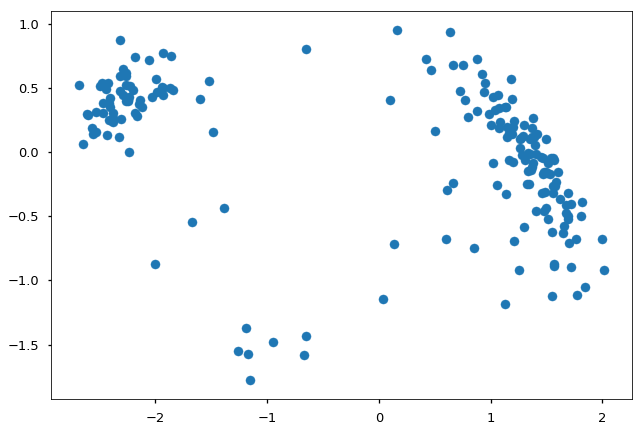

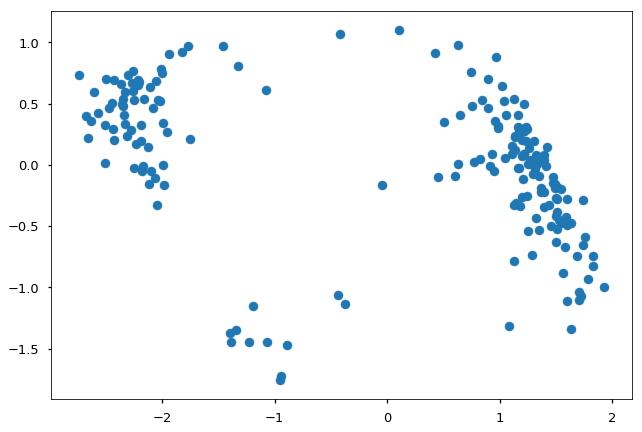

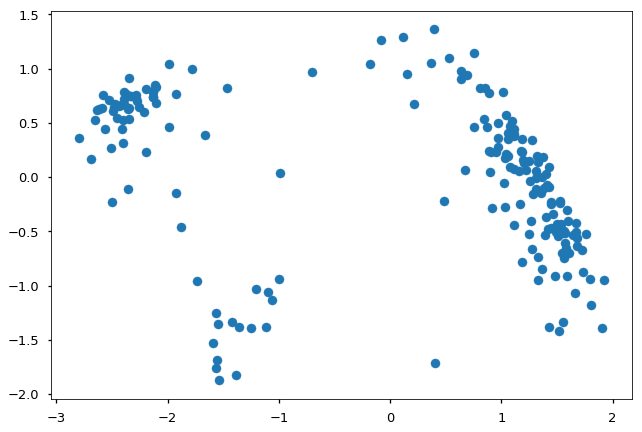

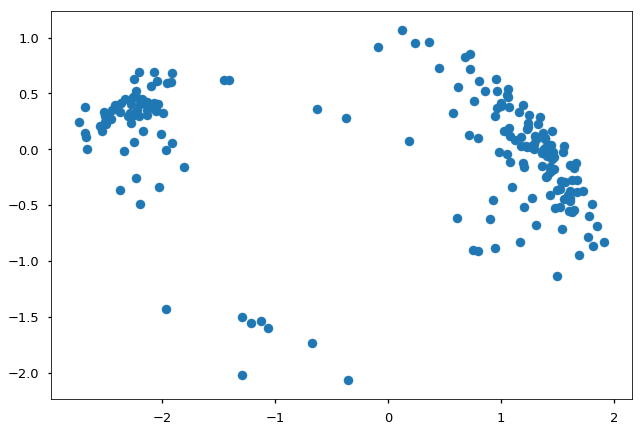

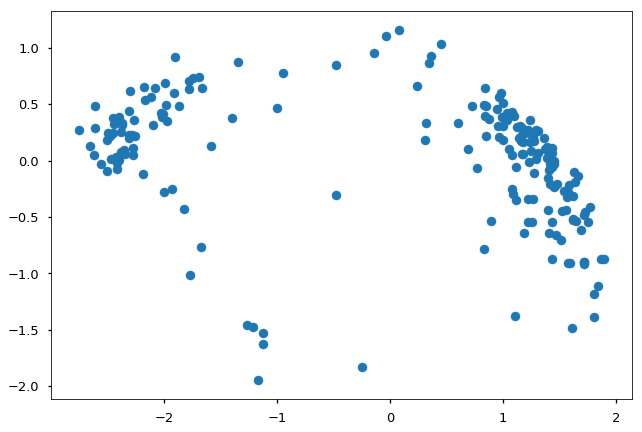

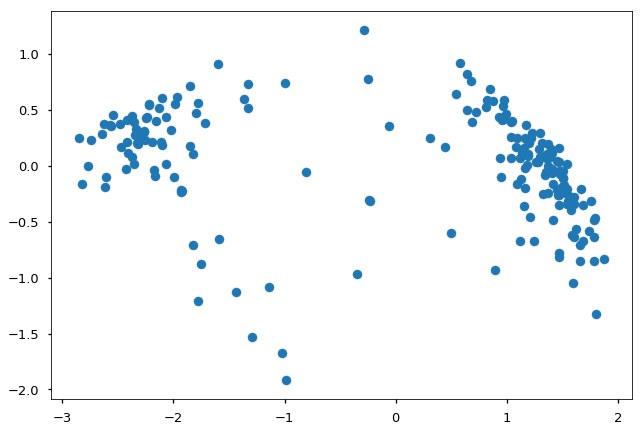

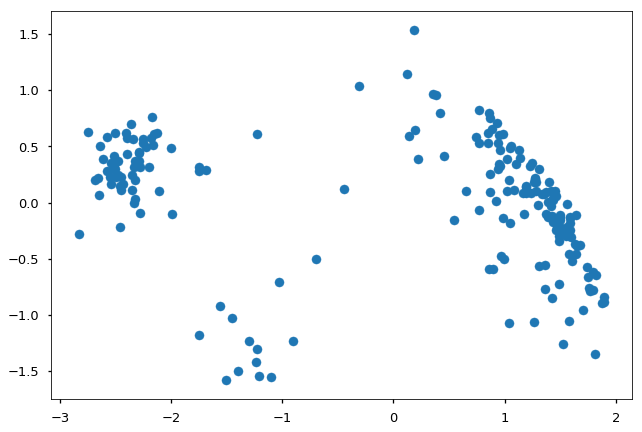

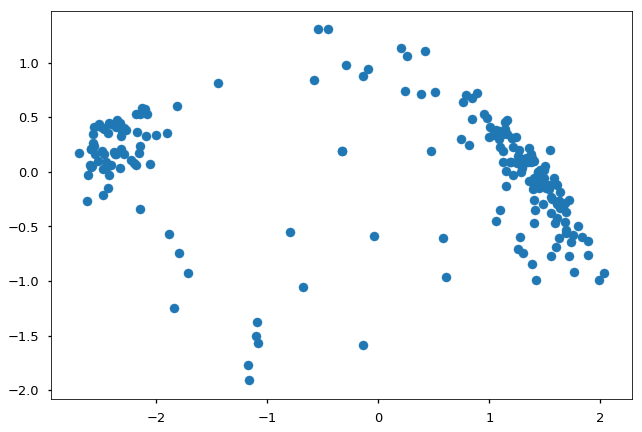

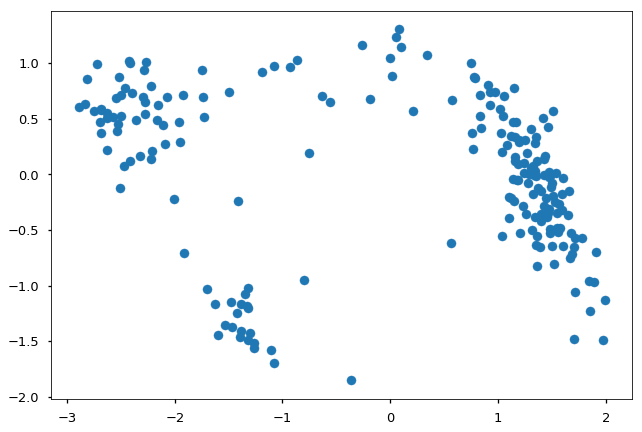

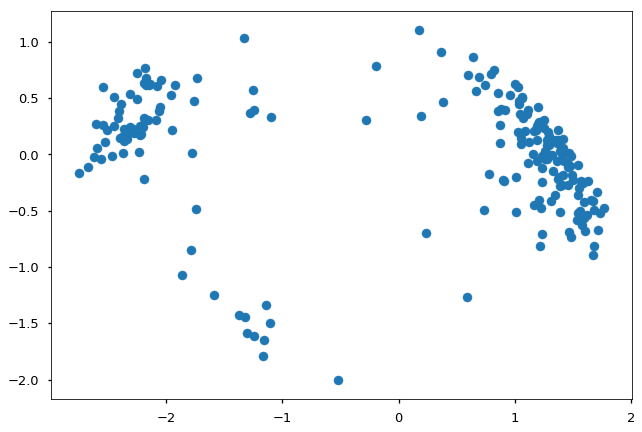

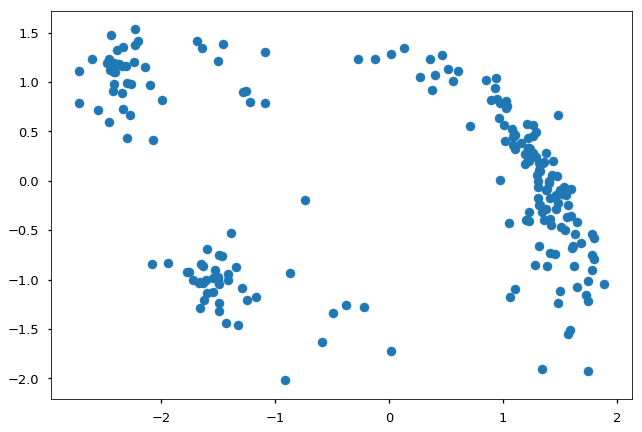

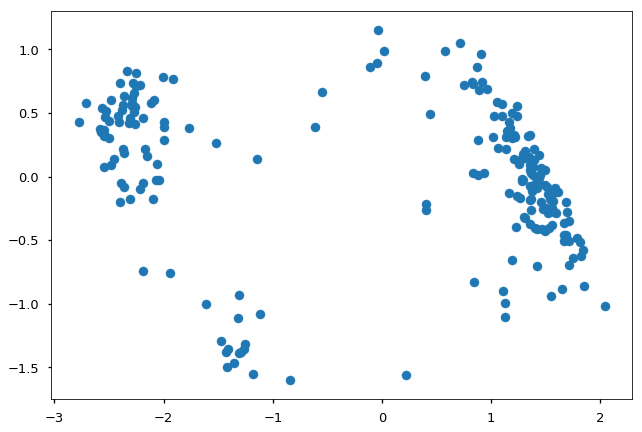

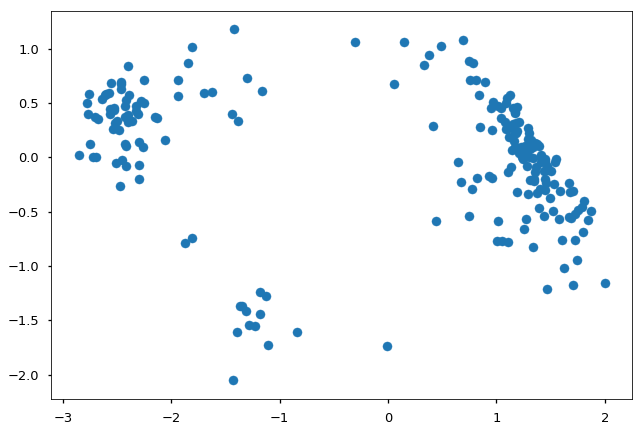

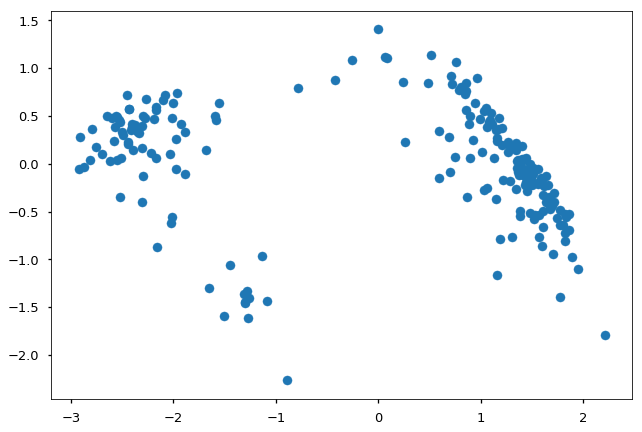

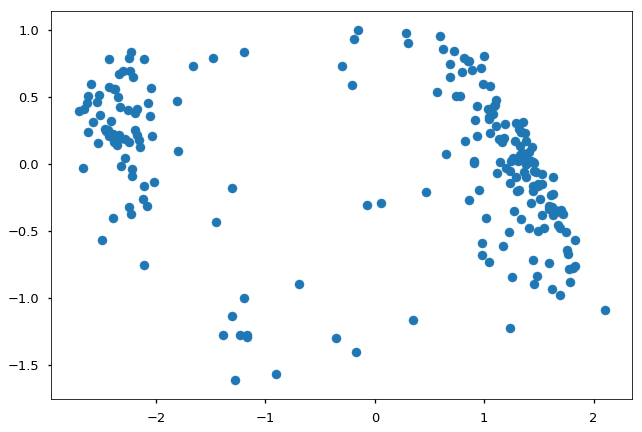

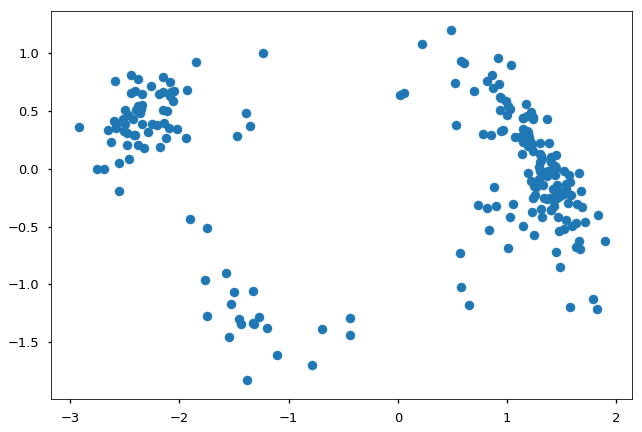

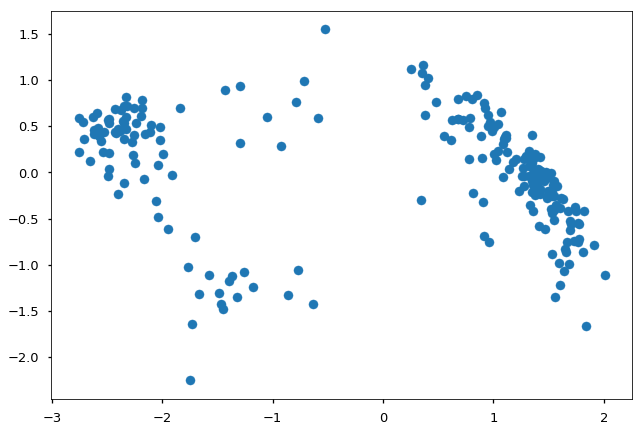

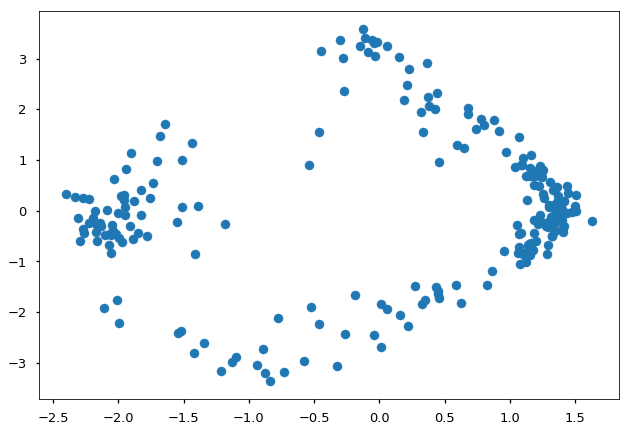

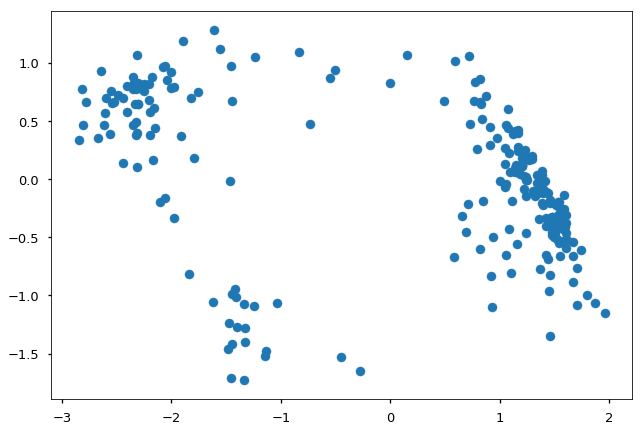

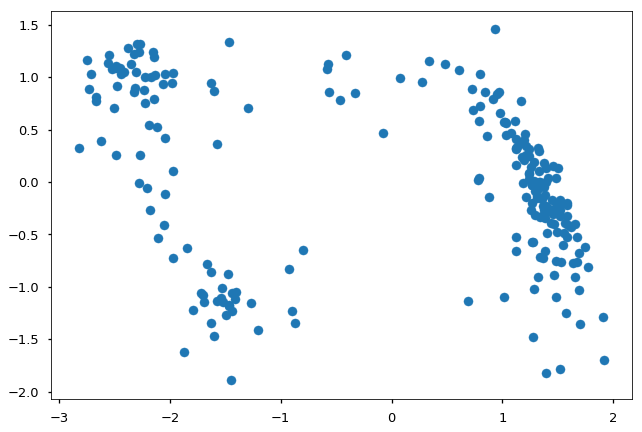

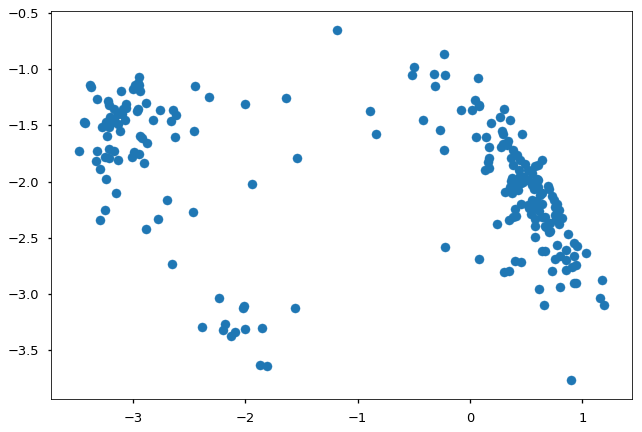

In [121]:
for i in range(0,number_of_steps):
    node_embedding = MacrostatesHandlers.time_index_macro(gd_directory,
                                         "node2vec_macrostates",
                                         "aligned-node2vec",
                                         i)
    w = np.array(node_embedding.values())
    plt.scatter(w[:,0], w[:,1],label="{0}".format(i))
    plt.show()